<a href="https://colab.research.google.com/github/ankitbatra22/Deep-Learning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline

In [63]:
def load_dataset():
    dataset = h5py.File('./train_catvnoncat.h5', "r")
    trainX = np.array(dataset["train_set_x"][:]) 
    trainY = np.array(dataset["train_set_y"][:]) 
    test_dataset = h5py.File('./test_catvnoncat.h5', "r")
    testX = np.array(test_dataset["test_set_x"][:])
    testY = np.array(test_dataset["test_set_y"][:]) 
    classes = np.array(test_dataset["list_classes"][:])
    
    trainY = trainY.reshape((1, trainY.shape[0]))
    testY = testY.reshape((1, testY.shape[0]))
    
    return trainX, trainY, testX, testY, classes


train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

0


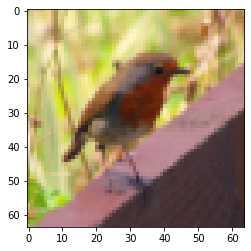

In [64]:
plt.imshow(train_set_x_orig[10])
print(train_set_y[0][10])

In [65]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [66]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    return w, b

In [67]:
###  Forward and Backward propagation ###
def propagate(w, b, X, Y):
    """
    w -> weights (px,px,3,1)
    b -> bias
    X -> image (px,px,3,1)
    Y -> binary cat or not
    """
    # this is m
    numSamples = X.shape[1]
    #activation
    A = sigmoid(np.dot(w.T, X) + b)
    #cost
    cost = (- 1 / numSamples) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    # backward prop
    # dw = x * dz
    dw = 1/numSamples*(np.dot(X, ((A-Y).T)))
    # db = dz
    db = 1/numSamples*(np.sum(A-Y))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [68]:
def optimize(w, b, X, Y, iterations, lr, print_cost = False):

    costs = []
    
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        #update rule!!
        w = w - lr * dw
        b = b - lr * db


        if i % 100 == 0:
            costs.append(cost)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [69]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    
    return Y_prediction

In [70]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])

    # grad descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: ", (100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: ", (100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [71]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy:  99.04306220095694
test accuracy:  70.0


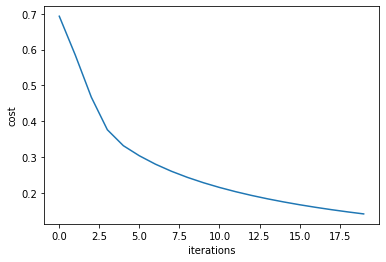

In [74]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()